# Mini Project Exploratory Data Analysis

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import colorsys

xG - expected goals metric, it is a statistical measure of the quality of chances created and conceded.

xG_diff - difference between actual goals scored and expected goals.

npxG - expected goals without penalties and own goals.

xGA - expected goals against.

xGA_diff - difference between actual goals missed and expected goals against.

npxGA - expected goals against without penalties and own goals.

npxGD - difference between "for" and "against" expected goals without penalties and own goals.

ppda_coef - passes allowed per defensive action in the opposition half (power of pressure)

oppda_coef - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)

deep - passes completed within an estimated 20 yards of goal (crosses excluded)

deep_allowed - opponent passes completed within an estimated 20 yards of goal (crosses excluded)

xpts - expected points

xpts_diff - difference between actual and expected points

In [115]:
stats = pd.read_csv('understat.csv')
stats.isnull().values.any()

False

In [116]:
#Rename first 2 columns & remove the teams which are from RFPL league.
stats.rename(columns = {'Unnamed: 0':'league', 'Unnamed: 1':'year'}, inplace = True)
stats = stats[stats.league != 'RFPL']

In [15]:
print(stats.league.unique())
#stats.groupby(['team']).first()
stats

['La_liga' 'EPL' 'Bundesliga' 'Serie_A' 'Ligue_1']


,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,Ligue_1,2019,16,Dijon,28,7,9,12,27,37,...,39.300382,2.300382,38.540489,-11.922529,14.308293,9.703021,111,176,31.1870,1.1870
584,Ligue_1,2019,17,Saint-Etienne,28,8,6,14,29,45,...,37.725643,-7.274357,33.165148,-7.314121,10.718417,10.496213,93,133,32.6755,2.6755
585,Ligue_1,2019,18,Nimes,28,7,6,15,29,44,...,40.473400,-3.526600,37.433020,-8.759464,12.457197,9.054791,109,159,32.6876,5.6876
586,Ligue_1,2019,19,Amiens,28,4,11,13,31,50,...,38.426209,-11.573791,37.666119,-15.972138,12.449507,9.917285,101,148,32.8361,9.8361


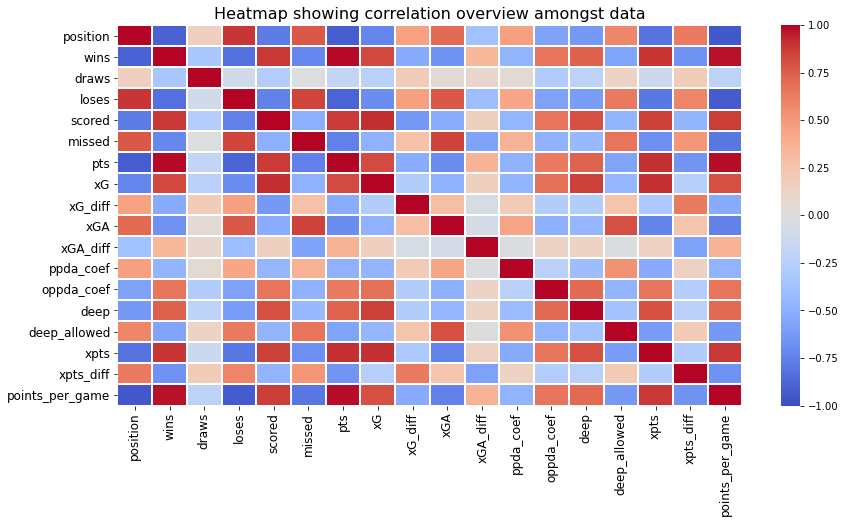

In [8]:
# Correlation Heatmap
stats_H = stats.drop(['year', 'matches', 'npxGA', 'npxGD', 'npxG'], 1)
cormat = stats_H.corr()
round(cormat, 2)
plt.figure(figsize=(14,7))
sns.heatmap(cormat, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1)
plt.title('Heatmap showing correlation overview amongst data', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

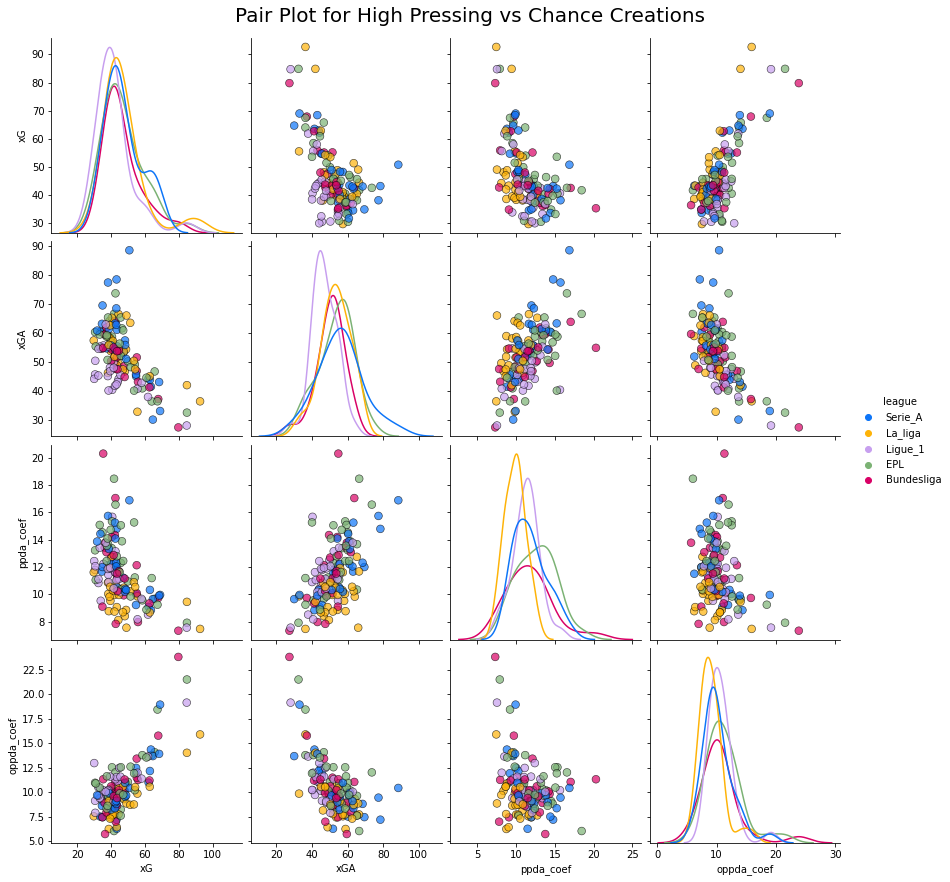

In [50]:
# help see correlation of high pressing to chance creation likelihoood.
stats_P = stats.groupby(["team"]).agg({'league': 'first','xG': 'mean', 'xGA':'mean', 'ppda_coef':'mean','oppda_coef':'mean'})
colors = ["deep sky blue", "amber", "lavender", "faded green","dark hot pink"]
sns.pairplot(stats_P, hue='league', palette=sns.xkcd_palette(colors) ,diag_kind='kde', diag_kws=dict(fill=False) ,plot_kws = {'alpha':0.7 ,'s': 60,  'edgecolor': 'k'}, height = 3)
plt.suptitle('Pair Plot for High Pressing vs Chance Creations',fontsize=20, y=1.02);

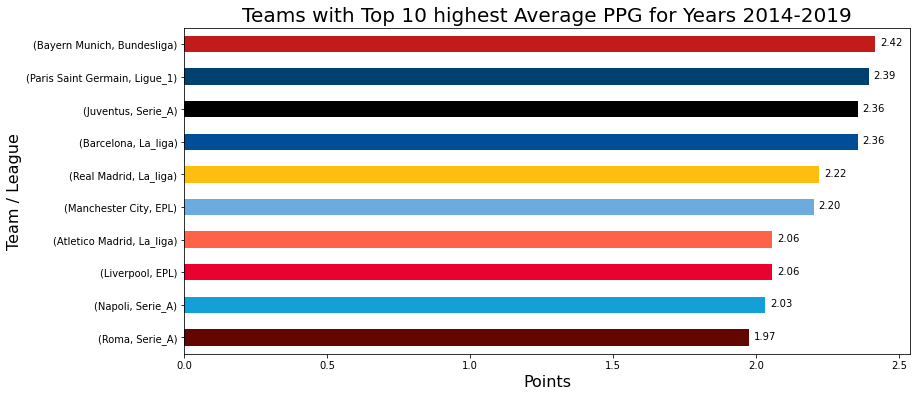

In [67]:
# Average yearly PPG total for each team (Using this 100000000000%) LEGEND CHECK better as factors that some leavues may have fewer games. 
stats['points_per_game'] = stats['pts'] / stats['matches']

ax = stats.groupby(['team', 'league'])['points_per_game'].mean().sort_values(ascending = False).head(10).plot(kind='barh', color = (['#C21B1B','#004170','#000000', '#004D98', '#FEBE10', '#6CABDD', '#FF6347', '#E8002E', '#12A0D7', '#630600']) , figsize=(13,6))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, -10), textcoords='offset points')
plt.title('Teams with Top 10 highest Average PPG for Years 2014-2019', fontsize=20)
plt.gca().invert_yaxis()
plt.xlabel('Points', fontsize=16)
plt.ylabel('Team / League', fontsize=16);

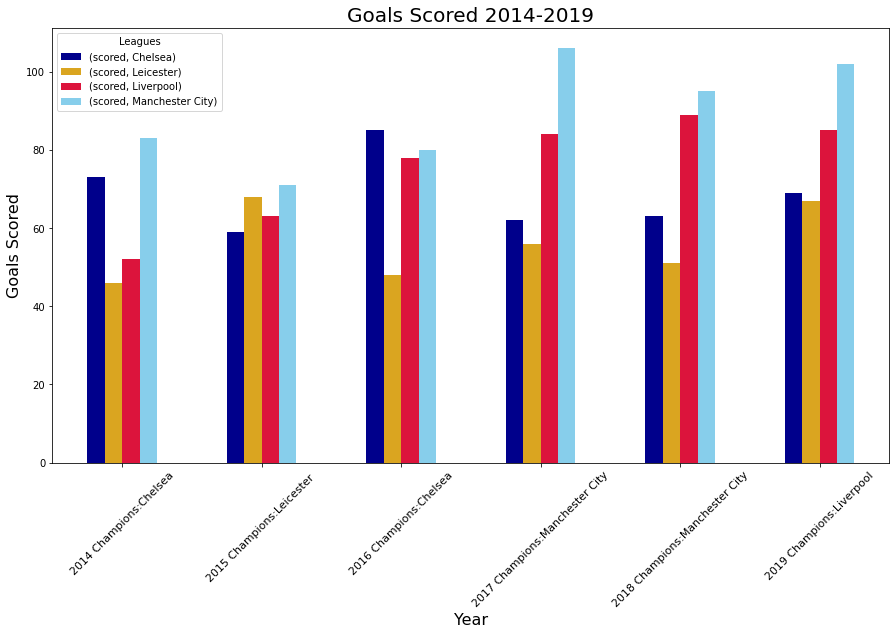

In [253]:
# Goals Scored EPL
teams = ['Manchester City','Leicester', 'Liverpool', 'Chelsea',]
stats_GS = pd.DataFrame(stats[stats['team'].isin(teams)].groupby(['year', 'team']).agg({'scored':'sum'}).sort_values(by='scored').unstack())
stats_GS.plot.bar(figsize=(15,8), color = (['darkblue', 'goldenrod', 'crimson', 'skyblue']))
plt.title('Goals Scored 2014-2019', fontsize = 20)
positions = (0, 1, 2, 3, 4, 5)
labels = ("2014 Champions:Chelsea", "2015 Champions:Leicester ", "2016 Champions:Chelsea", "2017 Champions:Manchester City", "2018 Champions:Manchester City", "2019 Champions:Liverpool")
plt.xticks(positions, labels, rotation = 45, fontsize =11)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Goals Scored', fontsize=16)
plt.legend(title= 'Leagues', loc = 2);

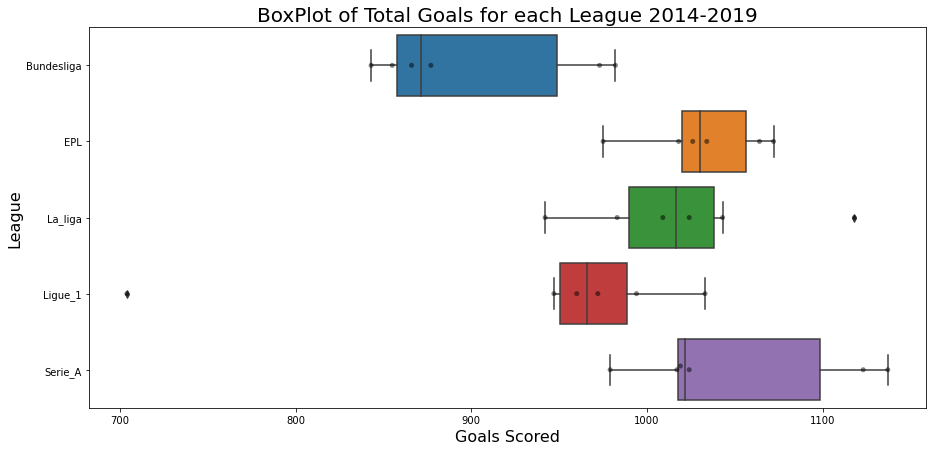

In [118]:
#BoxPlot for Goals Scored
stats_B = stats.groupby(['league', 'year']).agg({'league':'first', 'scored':'sum'})
plt.figure(figsize=(15,7))
sns.reset_orig()
#sns.set(style="darkgrid")
sns.boxplot(x='scored', y='league', data = stats_B)
sns.swarmplot(x='scored', y='league', data = stats_B,  color='black', alpha=0.5)
plt.title('BoxPlot of Total Goals for each League 2014-2019', fontsize = 20)
plt.xlabel('Goals Scored', fontsize=16)
plt.ylabel('League', fontsize=16);

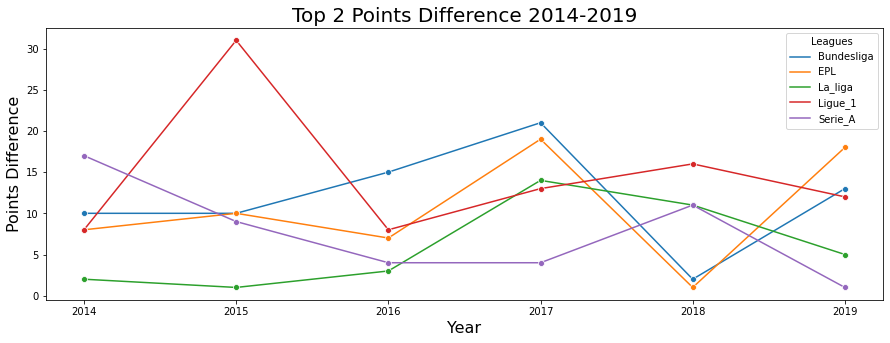

In [136]:
# Get top2 from each league for each year, and work out difference between them to determine how close/competitive title race was.
pos1 = stats[['year','league','pts']][stats['position']==1].sort_values(['league', 'year'])
pos2 = stats[['year','league','pts']][stats['position']==2].sort_values(['league', 'year'])
pos1.reset_index(inplace=True)
pos2.reset_index(inplace=True)
points_diff = pd.DataFrame(pos1['pts'] - pos2['pts'])

top2_each_year = stats[['year','league','position', 'team','pts']][(stats['position']== 1) | (stats['position']== 2)]
stats_PD = top2_each_year.groupby(['league', 'year']).agg(lambda x: ' '.join(x))
stats_PD.reset_index(inplace=True)
stats_PD = stats_PD.join(points_diff)
stats_PD.rename(columns = {'pts':'pts_diff', 'team':'top_two_teams'} ,inplace=True)

plt.figure(figsize=(15,5))
sns.lineplot(x = 'year', y='pts_diff', hue='league' ,data=stats_PD, marker="o")
plt.title('Top 2 Points Difference 2014-2019', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Points Difference', fontsize=16)
plt.legend(title= 'Leagues', loc=1);

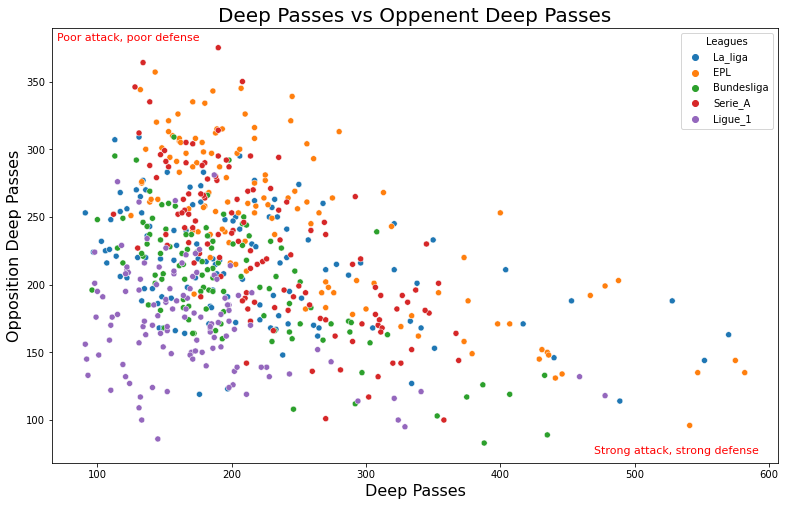

In [123]:
## Deep Passes vs Oppenent Deep Passes. Analyses how effectively a team can sustain attacks & prevent counter-attacks. 
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(data = stats, x ='deep',y = 'deep_allowed', hue='league')
plt.title('Deep Passes vs Oppenent Deep Passes', fontsize=20)
plt.xlabel('Deep Passes', fontsize=16)
plt.ylabel('Opposition Deep Passes', fontsize=16)
plt.legend(title= 'Leagues', loc=1)
ax.text(70,380,"Poor attack, poor defense",color="red",size="11")
ax.text(470,75,"Strong attack, strong defense",color="red",size="11");

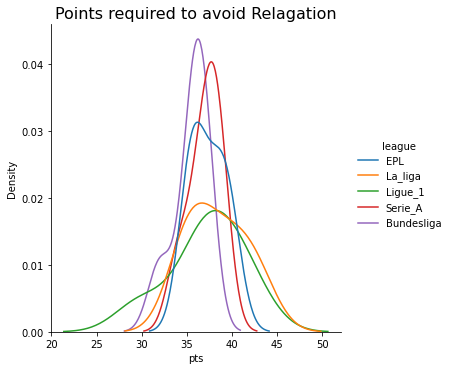

In [240]:
# Lists based on No. of teams in each league. Working out the average minimum required points for a team to avoid relagation based on their league over the 6 years.
league20 = ['EPL', 'La_liga', 'Ligue_1', 'Serie_A']
league18 = ['Bundesliga']

league_20 = stats[['year','league','team', 'pts']][(stats['league'].isin(league20)) & (stats['position']== 17)].groupby(['league', 'year']).mean()
league_18 = stats[['year','league', 'team', 'pts']][(stats['league'].isin(league18)) & (stats['position']== 15)].groupby(['league', 'year']).mean()
stats_r = league_20.append(league_18)
#stats_r.sort_values(by='pts', inplace=True)
sns.displot(stats_r, x = 'pts', hue = 'league', kind = 'kde')
plt.title('Points required to avoid Relagation', fontsize = 16);
